In [26]:
import tensorflow as tf
from tensorflow.keras import layers,models
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [27]:
#path to your image directory 
path = "PetImages"
dog_dir = os.path.join(path,"Dog")
cat_dir = os.path.join(path,"Cat")
reso = (32,32)
dogs = [os.path.join(dog_dir,i) for i in os.listdir(dog_dir) if i.endswith(".jpg")]
cats = [os.path.join(cat_dir,i) for i in os.listdir(cat_dir) if i.endswith("jpg")]
img_list = dogs+cats
img_array = []

Y_label = []
dogs[0]
print(len(img_list))

24959


In [28]:
def list_img_arr_img(lis_img,arr_img):
    for i in lis_img:

        ig = cv2.imread(i)

        if "Dog" in i:
            if ig is not None:
                img = cv2.resize(ig,(32,32))
                img_array = np.array(img)
                arr_img.append(img_array)
                Y_label.append(1)
        elif "Cat" in i:
            if ig is not None:
                img = cv2.resize(ig,(32,32))
                img_array = np.array(img)
                arr_img.append(img_array)
                Y_label.append(0)
    return arr_img

In [29]:
list_img_arr_img(img_list,img_array)
print("converted jpg to array")


Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


converted jpg to array


In [30]:

img_array = np.array(img_array)
img_array = img_array/255
Y_label = np.array(Y_label)
Y_label

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
#time for convolution
X_train, X_val, Y_train, Y_val = train_test_split(img_array,Y_label, test_size=0.2, random_state=1)
print(len(img_array))
print(len(Y_label))


24913
24913


In [32]:
cnn = models.Sequential([
    #cnn 
    layers.Conv2D(filters = 32,kernel_size =(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32,kernel_size =(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(2,activation="softmax"),
])

In [33]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [34]:
history = cnn.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))

Epoch 1/10
623/623 [==============================] - 8s 11ms/step - loss: 0.6351 - accuracy: 0.6211 - val_loss: 0.5581 - val_accuracy: 0.7200
Epoch 2/10
623/623 [==============================] - 7s 12ms/step - loss: 0.5413 - accuracy: 0.7252 - val_loss: 0.5488 - val_accuracy: 0.7134
Epoch 3/10
623/623 [==============================] - 6s 10ms/step - loss: 0.4951 - accuracy: 0.7580 - val_loss: 0.4889 - val_accuracy: 0.7648
Epoch 4/10
623/623 [==============================] - 6s 10ms/step - loss: 0.4643 - accuracy: 0.7770 - val_loss: 0.4897 - val_accuracy: 0.7642
Epoch 5/10
623/623 [==============================] - 6s 10ms/step - loss: 0.4357 - accuracy: 0.7931 - val_loss: 0.4729 - val_accuracy: 0.7706
Epoch 6/10
623/623 [==============================] - 7s 11ms/step - loss: 0.4131 - accuracy: 0.8080 - val_loss: 0.4923 - val_accuracy: 0.7624
Epoch 7/10
623/623 [==============================] - 7s 11ms/step - loss: 0.3830 - accuracy: 0.8240 - val_loss: 0.5386 - val_accuracy: 0.7477

156/156 - 1s - loss: 0.5027 - accuracy: 0.7875 - 629ms/epoch - 4ms/step


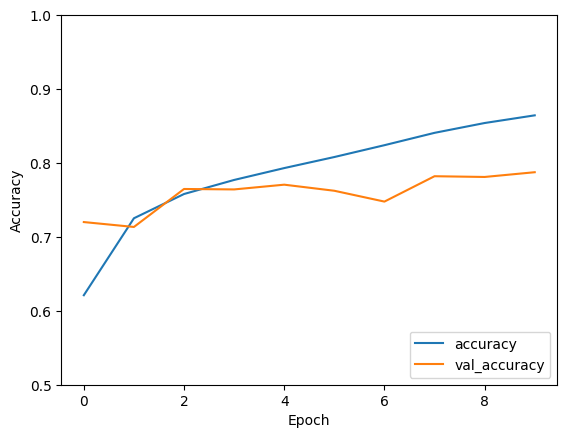

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_val,Y_val, verbose=2)